### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Load dataset

In [3]:
df= pd.read_csv("data.csv")

In [4]:
df.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [5]:
df.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [7]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

### Select features and target

In [8]:
feature_columns = ["Sales Person", "Product", "Amount", "Boxes Shipped"]  
target_column = "Country" 

### Encode categorical columns

In [9]:
encoder = LabelEncoder()
df_encoded = df.copy()
for col in feature_columns + [target_column]:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])


### Split dataset


In [10]:
X = df_encoded[feature_columns]
y = df_encoded[target_column]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Naive Bayes model

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

### Predictions

In [13]:
y_pred = model.predict(X_test)


### Evaluate model

In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 17.81%


### Confusion matrix heatmap

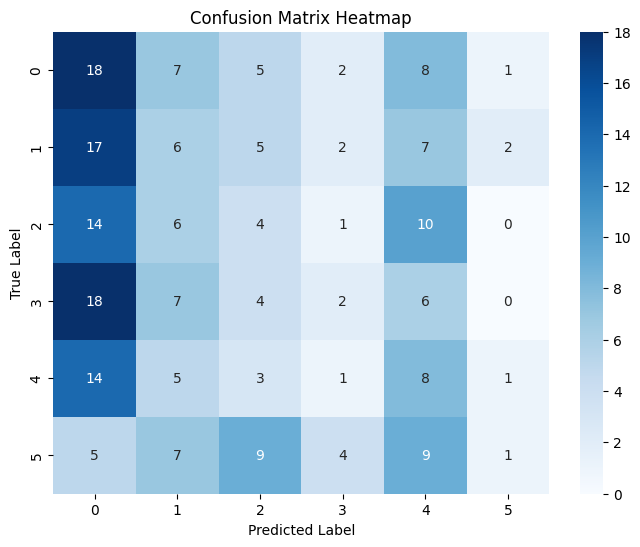

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Encode categorical columns

In [21]:
encoders = {} 

for col in feature_columns + [target_column]:
    encoders[col] = LabelEncoder()
    df_encoded[col] = encoders[col].fit_transform(df_encoded[col])  


### Predict on user input (Example: Assume user enters new data)

In [22]:
user_input = pd.DataFrame([["John Doe", "Laptop", 5000, 10]], columns=feature_columns)

### Encode user input

In [ ]:
for col in feature_columns:
    if user_input[col][0] in encoders[col].classes_:
        user_input[col] = encoders[col].transform(user_input[col])
    else:
        user_input[col] = -1  # Assign unknown values a special number

predicted_country = model.predict(user_input)
print(f"The predicted country for the input data is: {encoders[target_column].inverse_transform(predicted_country)[0]}")


The predicted country for the input data is: 3


# Text Classification using logistic Regression

### import libraries

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:

data = pd.read_csv("data.csv")
print("Dataset Preview:")
print(data.head())

print("\nAvailable Columns:", data.columns)

Dataset Preview:
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  

Available Columns: Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')


### Use 'Product' as text input and 'Country' as the label

In [ ]:
text_col = 'Product'
label_col = 'Country'
if text_col not in data.columns or label_col not in data.columns:
    raise ValueError(f"Could not find appropriate label and text columns. Found: {data.columns}")

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data[label_col])

### Feature extraction using CountVectorizer

In [40]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data[text_col])
y = data['label']

### Split data into training and testing sets


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Train Logistic Regression model

In [42]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)


### Evaluate model accuracy

In [43]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 16.79%


### Function to classify a new product

In [44]:
def classify_product(model, vectorizer, label_encoder, product_name):
    product_vect = vectorizer.transform([product_name])
    predicted_label = model.predict(product_vect)[0]
    predicted_country = label_encoder.inverse_transform([predicted_label])[0]
    return predicted_country

### Example usage

In [45]:
product_name = "Laptop"
predicted_country = classify_product(model, vectorizer, label_encoder, product_name)
print(f"The product '{product_name}' is most likely from '{predicted_country}'")

The product 'Laptop' is most likely from 'Australia'


# Text Classification using RNN

In [65]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("data.csv")

X_text = data['Product'].astype(str)  # Convert to string to avoid dtype issues
y_labels = data['Country'].astype(str)


### Encode country labels as numbers

In [66]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)

### Split dataset into training and testing sets


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)


### Using TensorFlow's TextVectorization layer for text processing


In [69]:
vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_mode='int')
vectorizer.adapt(X_train)

### Build Deep Learning Model


In [70]:
model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')  # Output layer
])

### Compile Model


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.1650 - loss: 1.7920 - val_accuracy: 0.1735 - val_loss: 1.7922
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.1903 - loss: 1.7898 - val_accuracy: 0.1872 - val_loss: 1.7930
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.1821 - loss: 1.7881 - val_accuracy: 0.1963 - val_loss: 1.7956
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.1873 - loss: 1.7851 - val_accuracy: 0.1598 - val_loss: 1.8059
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.2110 - loss: 1.7772 - val_accuracy: 0.1872 - val_loss: 1.8115
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.2010 - loss: 1.7702 - val_accuracy: 0.1644 - val_loss: 1.8124
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.2122 - loss: 1.7737 - val_accuracy: 0.1689 - val_loss: 1.8154
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.2260 - loss: 1.7637 - val_accuracy: 0.1

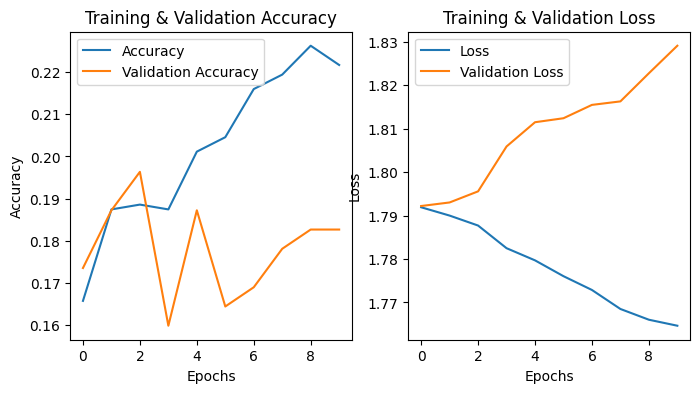

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted Country for 'Peanut Butter Cubes': New Zealand


In [ ]:

X_text = data['Product'].astype(str) 
y_labels = data['Country'].astype(str)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_labels)

X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y_encoded, test_size=0.2, random_state=42)
vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=20)
vectorizer.adapt(X_train_text)
X_train = vectorizer(X_train_text)
X_test = vectorizer(X_test_text)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(encoder.classes_), activation='softmax')  
])

# Compile Model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

# Plot Accuracy & Loss
history_dict = history.history

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

# Function to Predict Country
def predict_country(product_name):
    product_vector = vectorizer([product_name]) 
    prediction = model.predict(product_vector)
    predicted_class = np.argmax(prediction)
    return encoder.inverse_transform([predicted_class])[0]

# Example Prediction
sample_product = "Peanut Butter Cubes"
print(f"Predicted Country for '{sample_product}': {predict_country(sample_product)}")



# Text clasification using CNN

In [79]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### Display dataset columns

In [ ]:

print("Available Columns in Dataset:", data.columns)

text_column = "Product"  
label_column = "Country" 

if text_column not in data.columns or label_column not in data.columns:
    raise ValueError(f"Columns '{text_column}' or '{label_column}' not found in dataset!")


Available Columns in Dataset: Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')


### Drop any missing values

In [81]:

data = data[[text_column, label_column]].dropna()


### Convert categorical labels to numerical values


In [82]:

label_encoder = LabelEncoder()
data[label_column] = label_encoder.fit_transform(data[label_column])

### Tokenize text data


In [83]:

max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data[text_column])
sequences = tokenizer.texts_to_sequences(data[text_column])

### Pad sequences


In [84]:

max_length = 100
X = pad_sequences(sequences, maxlen=max_length)
y = data[label_column]


### Split dataset


In [85]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Build CNN Model

In [ ]:


model = Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_length),
    Conv1D(250, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(250, activation='relu'),
    Dense(len(data[label_column].unique()), activation='softmax')  
])


c:\Users\M.A Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Compile Model


In [87]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model


In [88]:

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.1580 - loss: 1.7934 - val_accuracy: 0.1861 - val_loss: 1.7933
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.1944 - loss: 1.7881 - val_accuracy: 0.1752 - val_loss: 1.7946
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1920 - loss: 1.7830 - val_accuracy: 0.1642 - val_loss: 1.8017
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2223 - loss: 1.7756 - val_accuracy: 0.1788 - val_loss: 1.8114
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2366 - loss: 1.7573 - val_accuracy: 0.1715 - val_loss: 1.8283


### Predict


In [89]:


y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.17
Precision: 0.14
Recall: 0.17
F1-score: 0.13


c:\Users\M.A Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
